In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
dbCompleto = pd.read_csv('dbCompleto.csv', sep=',' , encoding='latin-1')

In [4]:
dbCompleto

,id_cliente,peso,colesterol,genero,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais
0,1,102.0,111,1,39,Servidor PÃÂºblico,Ensino MÃÂ©dio Completo,2,Solteiro,Branco,2.0,4754,AL,Alagoas,Nordeste,Brasil
1,27,108.0,123,0,19,EstagiÃÂ¡rio,Ensino MÃÂ©dio Incompleto,2,Solteiro,Branco,2.0,1100,AL,Alagoas,Nordeste,Brasil
2,111,131.0,162,1,38,FuncionÃÂ¡rio Setor Privado,Mestrado,2,Casado,Branco,4.0,6836,AL,Alagoas,Nordeste,Brasil
3,144,175.0,214,1,70,Aposentado,Ensino MÃÂ©dio Completo,2,Solteiro,Branco,4.0,2616,AL,Alagoas,Nordeste,Brasil
4,153,100.0,107,1,21,FuncionÃÂ¡rio Setor Privado,Ensino MÃÂ©dio Incompleto,2,Solteiro,Branco,3.0,1100,AL,Alagoas,Nordeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,279,132.0,161,0,24,FuncionÃÂ¡rio Setor Privado,Ensino MÃÂ©dio Completo,20,Casado,Branco,2.0,3627,RN,Rio Grande do Norte,Nordeste,Brasil
539,281,116.0,141,0,42,EmpresÃÂ¡rio,Ensino MÃÂ©dio Completo,20,Casado,Branco,1.0,6407,RN,Rio Grande do Norte,Nordeste,Brasil
540,288,174.0,214,0,25,FuncionÃÂ¡rio Setor Privado,Ensino MÃÂ©dio Completo,20,Solteiro,Branco,4.0,2759,RN,Rio Grande do Norte,Nordeste,Brasil
541,424,118.0,135,0,36,FuncionÃÂ¡rio PÃÂºblico,Mestrado,20,Solteiro,Branco,4.0,7855,RN,Rio Grande do Norte,Nordeste,Brasil


In [3]:
dados_cliente = dbCompleto[['peso', '', 'idade']]
dados_cliente.head()

,peso,colesterol,idade
0,102.0,111,39
1,108.0,123,19
2,131.0,162,38
3,175.0,214,70
4,100.0,107,21


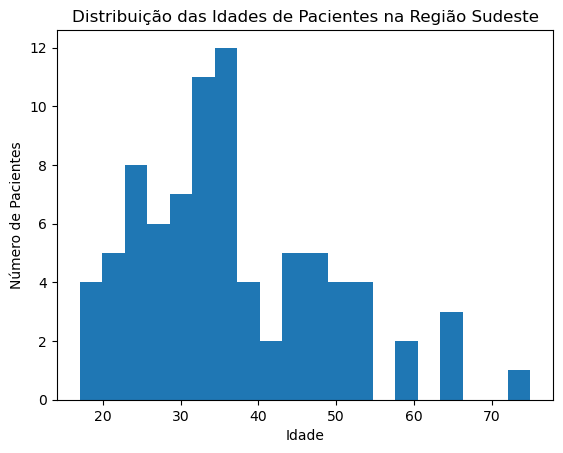

In [10]:
sudeste = dbCompleto[dbCompleto['regiao'] == 'Sudeste']

plt.hist(sudeste['idade'], bins=20)
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.title('Distribuição das Idades de Pacientes na Região Sudeste')
plt.show()

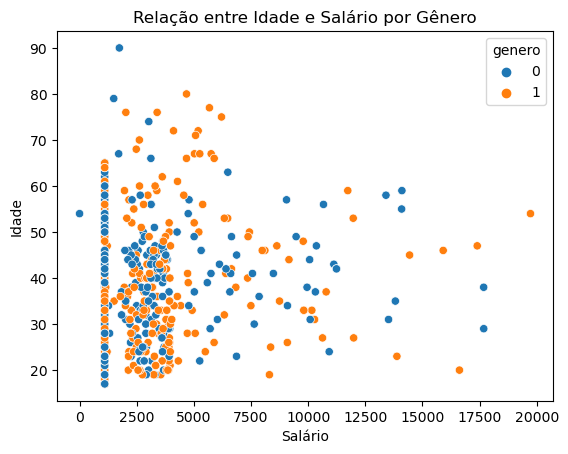

In [14]:
sns.scatterplot(x='salario', y='idade', hue='genero', data=dbCompleto)

plt.title('Relação entre Idade e Salário por Gênero')
plt.xlabel('Salário')
plt.ylabel('Idade')

plt.show()

In [15]:
nordeste = dbCompleto[dbCompleto['regiao'] == 'Nordeste']

mediaSalarialNordeste = nordeste['salario'].mean()

print("A média salarial na região Nordeste é:", mediaSalarialNordeste)

A média salarial na região Nordeste é: 3433.313953488372


In [17]:
nordeste = dbCompleto[dbCompleto['regiao'] == 'Nordeste']

mediaIdadePorEstado = nordeste.groupby('estado')['idade'].mean()

estadoMaiorMedia = mediaIdadePorEstado.idxmax()

print("O estado do Nordeste com a maior média de idade é:", estadoMaiorMedia)

O estado do Nordeste com a maior média de idade é: PiauÃ­


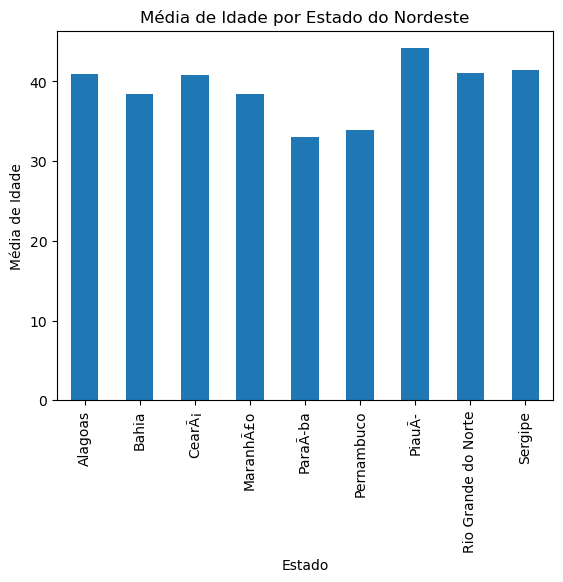

In [18]:
mediaIdadePorEstado.plot(kind='bar')
plt.title('Média de Idade por Estado do Nordeste')
plt.xlabel('Estado')
plt.ylabel('Média de Idade')
plt.show()

In [20]:
pacientesMestrado = dbCompleto[dbCompleto['escolaridade'] == 'Mestrado']

contagemPorEstado = pacientesMestrado['estado'].value_counts()

estadoMaiorContagem = contagemPorEstado.idxmax()

print("O estado com o maior número de pacientes com mestrado é:", estadoMaiorContagem)

O estado com o maior número de pacientes com mestrado é: Santa Catarina


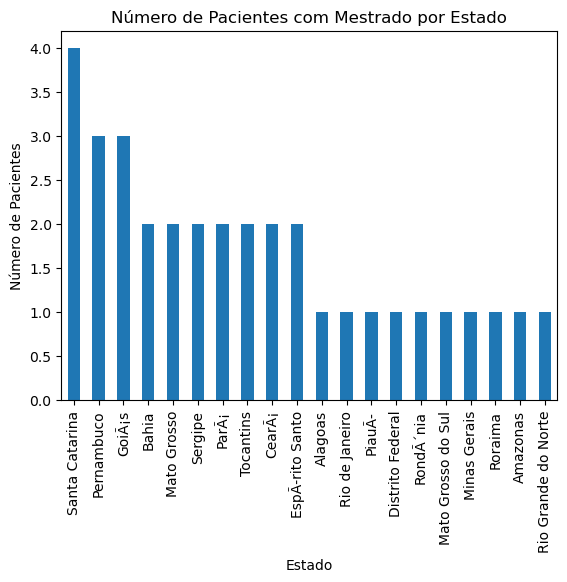

In [21]:
contagemPorEstado.plot(kind='bar')
plt.title('Número de Pacientes com Mestrado por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Pacientes')
plt.show()

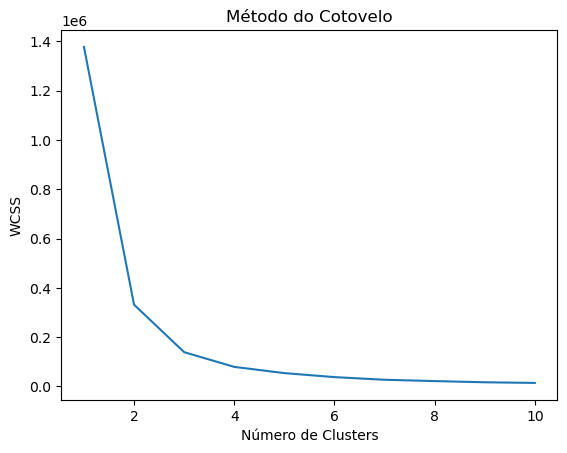

O valor de WCSS para o terceiro cluster é: 138862.206


In [33]:
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

wcssTerceiroCluster = round(wcss[2], 3)  
print("O valor de WCSS para o terceiro cluster é:", wcssTerceiroCluster)

<AxesSubplot:xlabel='peso', ylabel='colesterol'>

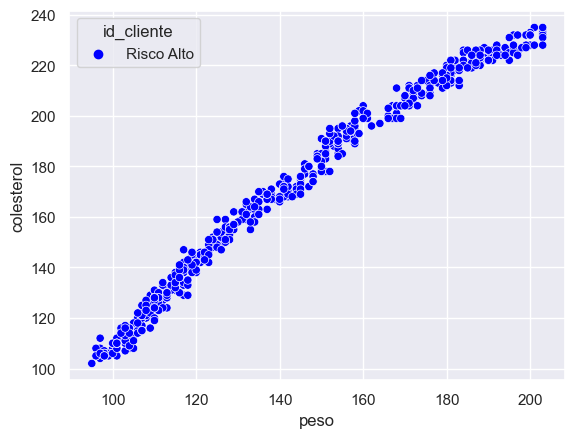

In [57]:
dbCompleto['id_cliente'] = np.where(dbCompleto['id_cliente'] == 1, 'Risco Baixo',
                                 np.where(dbCompleto['id_cliente'] == 2, 'Risco Moderado', 'Risco Alto'))

sns.scatterplot(data=dbCompleto,  
                x='peso',  
                y='colesterol',  
                hue='id_cliente',  
                palette={'Risco Baixo': 'red',  
                         'Risco Moderado': 'green',  
                         'Risco Alto': 'blue'})